# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.096455e+01     7.676691e+00
 * time: 0.0040130615234375
     1     3.050306e+01     4.955435e+00
 * time: 0.012964010238647461
     2     1.812573e+01     3.136314e+00
 * time: 0.03896212577819824
     3     1.391504e+01     2.290554e+00
 * time: 0.06060504913330078
     4     1.239033e+01     1.813005e+00
 * time: 0.08127808570861816
     5     1.186932e+01     1.809942e+00
 * time: 0.09756112098693848
     6     1.163724e+01     3.460420e+00
 * time: 0.16186118125915527
     7     1.026881e+01     1.619649e+00
 * time: 0.17655301094055176
     8     9.390945e+00     8.744325e-01
 * time: 0.19115519523620605
     9     9.146072e+00     1.729474e+00
 * time: 0.20305919647216797
    10     8.978541e+00     1.347281e+00
 * time: 0.21575117111206055
    11     8.925994e+00     1.358724e+00
 * time: 0.22725701332092285
    12     8.799172e+00     8.154522e-01
 * time: 0.2390429973602295
    13     8.658901e+00     4.268030e-01
 * time: 

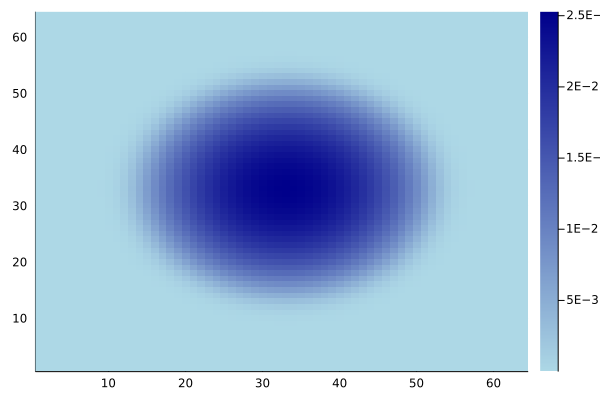

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)